In [80]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

import os
for dirname, _, filenames in os.walk('C:/Users/아이루디/Downloads/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/아이루디/Downloads/titanic\gender_submission.csv
C:/Users/아이루디/Downloads/titanic\test.csv
C:/Users/아이루디/Downloads/titanic\train.csv


In [81]:
train=pd.read_csv('C:/Users/아이루디/Downloads/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
#타이타닉 train  데이터의 정보 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
#타이타닉 train 데이터의 결측치 체크 
#Age, Cabin , Embarked 에 null 데이터가 존재한다.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
print('데이터 수:',train.shape[0], '특성 수:',train.shape[1])

데이터 수: 891 특성 수: 12


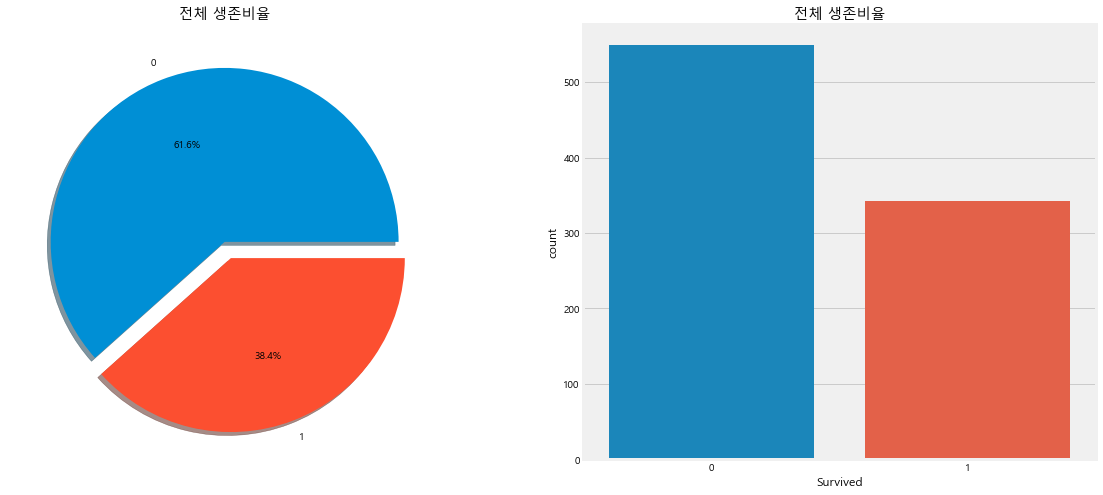

In [85]:
#일단 target인 생존 비율을 살펴보자.
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('전체 생존비율')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=train,ax=ax[1])
ax[1].set_title('전체 생존비율')
plt.show()

In [86]:
#성에 따른 생존 수 비교
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [87]:
pd.crosstab(train.Sex,train.Survived,margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


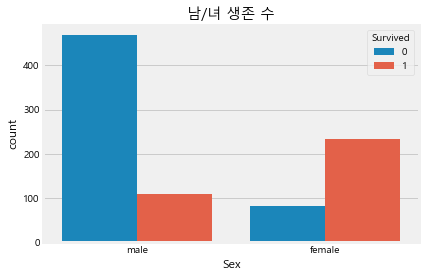

In [88]:
#데이터에는 male과 female로 분류
#학습하는 데 유용한 특성이라고 판단!
sns.countplot('Sex',hue='Survived',data=train)
plt.title("남/녀 생존 수")
plt.show()

In [89]:
#PClass
#pclass 에 따른 생존 수 나타내기
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [90]:
#보기 좋게 표로 나타내기
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


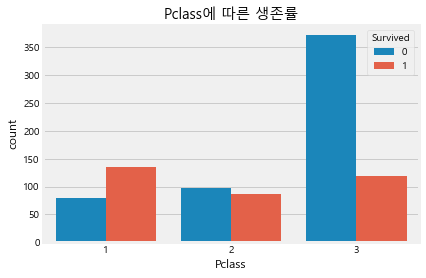

In [91]:
#Pclass에 따른 생존률도 다른 양상을 보인다.
#타겟값을 예측하는데 중요한 특성이라고 판단.
sns.countplot('Pclass',hue='Survived',data=train)
plt.title('Pclass에 따른 생존률')
plt.show()

In [92]:
#pclass 에 따른 생존률 수치로 확인해보기
pd.crosstab(train.Survived,train.Pclass,margins=True).style.background_gradient(cmap='Blues')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [93]:
#pclass와 성에 따른 생존률 살펴보기
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='Blues')

In [94]:
#Embarked에 따른 생존자 수 확인하기
train.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [95]:
#데이터 결측치 2개존재.
#표로 확인하기
pd.crosstab(train.Survived,train.Embarked,margins=True).style.background_gradient(cmap='summer_r')

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


In [96]:
#데이터 결측치 2개존재.
#지금까지 확인한 pclss ,sex,Embarked 에 따른 생존자 수 한번에 살펴보기
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

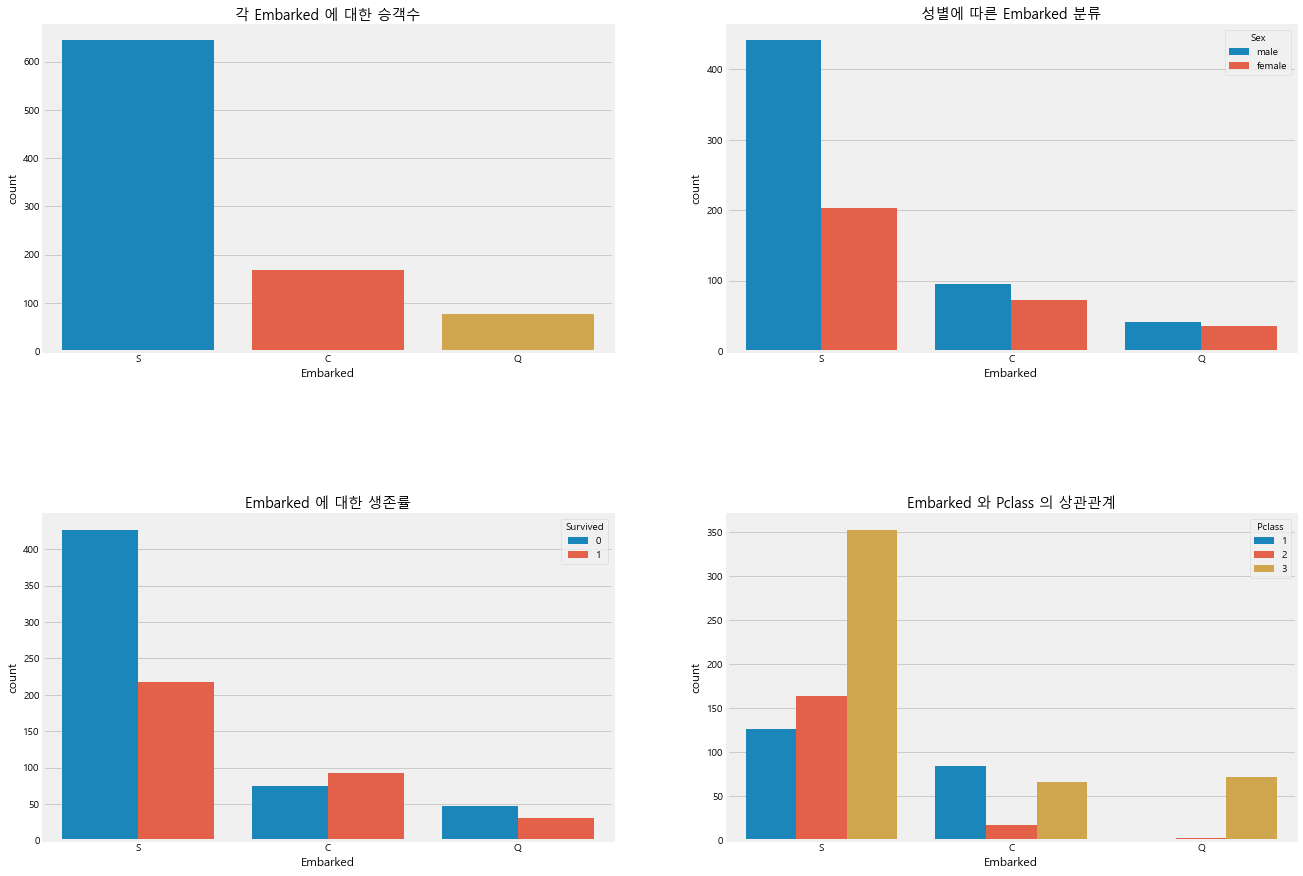

In [97]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('각 Embarked 에 대한 승객수')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('성별에 따른 Embarked 분류')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked 에 대한 생존률')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked 와 Pclass 의 상관관계')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [98]:
#데이터 결측치를 가장 빈도수가 많은 S 로 채워보기로 함.
train['Embarked'].fillna('S',inplace=True)

In [99]:
#데이터 결측없는 것 확인.
train.Embarked.isnull().any()

False

In [100]:
pd.crosstab(train.SibSp,train.Survived).style.background_gradient(cmap='Blues')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [101]:
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient(cmap='Blues')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [102]:
pd.crosstab(train.Parch,train.Survived).style.background_gradient(cmap='Blues')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [103]:
pd.crosstab(train.Parch,train.Pclass).style.background_gradient(cmap='Blues')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [104]:
pd.crosstab(train.Pclass,[train.SibSp,train.Survived]).style.background_gradient(cmap='Blues')

In [105]:
pd.crosstab(train.Pclass,[train.Parch,train.Survived]).style.background_gradient(cmap='Blues')

In [106]:
#Sibsp와 Parch를 하나의 가족사이즈라는 새로운 특성으로 취급
train['Family_Size']=train['Parch']+train['SibSp']+1

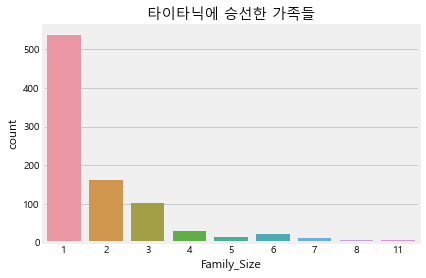

In [107]:
sns.countplot('Family_Size',data=train)
plt.title("타이타닉에 승선한 가족들")
plt.show()

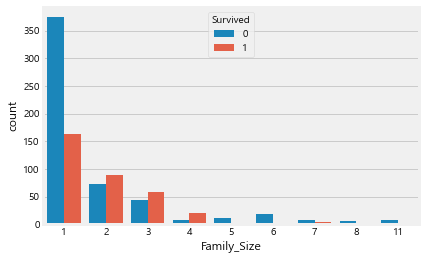

In [108]:
sns.countplot('Family_Size',hue="Survived",data=train)
plt.show()

In [109]:
#간단하게 남 / 여 는 0,1 로 대체
# EMbarked 는 각각 0,1,2로 대체
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [110]:
#일단 결측치가 많은 Age,Cabin은 제외하고 정확도를 측정해보자.
X = train.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId','Survived'],axis=1)
y = train['Survived']

In [111]:
#새로 추출한 데이터 확인
X.head(5)

,Pclass,Sex,SibSp,Parch,Embarked,Family_Size
0,3,0,1,0,0,2
1,1,1,1,0,1,2
2,3,1,0,0,0,1
3,1,1,1,0,0,2
4,3,0,0,0,0,1


In [112]:
#데이터 확인
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [149]:
#데이터 분류하기
#표준 스케일러로 데이터 전처리 해주기
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify=train['Survived'],random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
#1 K이웃
kclf = KNeighborsClassifier(n_neighbors=3)
kclf.fit(X_train_scaled,y_train)
print("k최근접 이웃 정확도: {:.3f}".format(kclf.score(X_test_scaled,y_test)))

k최근접 이웃 정확도: 0.799


In [151]:
#로지스틱
log = LogisticRegression()
log.fit(X_train_scaled, y_train)
print("LOG의 정확도:{:.3f}".format(log.score(X_test_scaled,y_test)))

LOG의 정확도:0.802


In [152]:
#가우시안 NB
gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)
print("가우시안모델의 정확도:{:.3f}".format(gnb.score(X_test_scaled,y_test)))

가우시안모델의 정확도:0.802


In [153]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
print("결정트리모델의 정확도: {:.3f}".format(dtc.score(X_test_scaled,y_test)))

결정트리모델의 정확도: 0.776


In [154]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=1000) 
rfc.fit(X_train_scaled, y_train)
print("랜덤 포레스트모델 정확도: {:.3f}".format(rfc.score(X_test_scaled,y_test)))

랜덤 포레스트모델 정확도: 0.813


In [155]:
GBC = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.1, random_state=0)
GBC.fit(X_train_scaled, y_train)
print("그라디언트 부스트모델 정확도:{:.3f}".format(GBC.score(X_test_scaled,y_test)))

그라디언트 부스트모델 정확도:0.787


In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

In [157]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
ada.fit(X_train_scaled,y_train)
print("Adaboost모델 정확도: {:.3f}".format(ada.score(X_test_scaled,y_test)))

Adaboost모델 정확도: 0.832


In [158]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
print("Xgboost모델 정확도: {:.3f}".format(xgb.score(X_test_scaled,y_test)))

[18:35:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost모델 정확도: 0.791


In [159]:
svc=SVC()
svc.fit(X_train_scaled,y_train)
print("SVC의 정확도:{:.3f}".format(svc.score(X_test_scaled,y_test)))

SVC의 정확도:0.806


In [163]:

mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[10],max_iter=1000, random_state =0)
mlp.fit(X_train_scaled,y_train)
print("MLP의 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))

MLP의 정확도:0.799


In [ ]:
#할일
#나이브 베이즈 분류기, 결정트리의 앙상블, 배깅,엑스트라 트리,에이다부스트 XGBoost ,신경망으로도 해보기
#데이터 전처리, 차원축소 등도 해보기
#검증은 교차검증까지만
#ppt만들기+보고서만들기
